In [1]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021


In [94]:
from statsmodels.tsa.arima_model import ARIMA
from Modelling import modelling
import matplotlib.pyplot as plt
from DataPrep.ImportData import importer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pyforest

In [3]:
df = importer().LagCreation()

In [17]:
df=df[df["Label"]==0]
df=df.sort_values("Start Date")

In [78]:
X = df[['Energy (kWh)_lag1', 'Energy (kWh)_lag2',
       'Energy (kWh)_lag3', 'Energy (kWh)_lag4', 'Energy (kWh)_lag5']]
y = df[["Energy (kWh)","Start Date"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

In [79]:
y_test.index=y_test["Start Date"]
y_test.index = pd.DatetimeIndex(y_test.index).to_period('D')
y_test = y_test.drop(columns="Start Date")
y_train.index = pd.DatetimeIndex(y_train.index).to_period('D')
y_train = y_train.drop(columns="Start Date")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
result = adfuller(y_train.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.568177
p-value: 0.099755


In [51]:
y_test = y_test.diff().dropna()
y_train = y_train.diff().dropna()

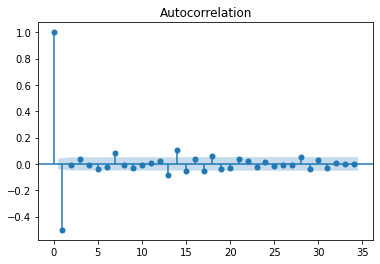

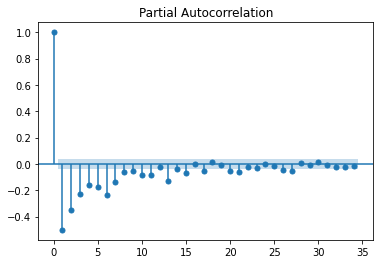

In [52]:
plot_acf(y_train)
plt.show()
plot_pacf(y_train)
plt.show()

In [95]:
model1 = ARIMA(y_train,order=(2,1,8))

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [68]:
model = auto_arima(y_train,
                    start_p=1,
                    d=None,
                    start_q=1,
                    max_p=5,
                    max_d=3,
                    max_q=5,
                    D=None,
                    m=1,
                    seasonal=False,
                    stepwise=True, 
                    trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2097.817, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3594.885, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2929.007, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2095.917, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2097.817, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2099.845, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2097.490, Time=0.41 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.309 seconds


In [188]:
model_fit1 = model1.fit(solver="bfgs")
model_fit1.mle_retvals
#model_fit = model.fit(y_train)

Optimization terminated successfully.
         Current function value: 0.446258
         Iterations: 38
         Function evaluations: 43
         Gradient evaluations: 43
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                     

{'fopt': 0.4462580670575093,
 'gopt': array([ 1.34559700e-06, -2.13935934e-06,  4.39706624e-06,  1.26678713e-07,
         2.76270316e-06, -3.26690018e-06,  1.23968274e-06, -2.10809014e-06,
        -1.36287817e-06, -3.22972764e-06, -5.76949140e-06]),
 'Hinv': array([[ 2.54887026e-04, -2.57361910e-04, -5.91396353e-05,
         -5.96804579e-05, -2.48165795e-04, -6.55243172e-05,
         -2.34687495e-05, -1.03131067e-05,  7.70076988e-05,
          9.88164548e-05,  3.35097589e-05],
        [-2.57361910e-04,  1.95871583e+02, -3.58569144e+01,
         -1.64145023e+02,  1.80964706e+02, -4.07322982e+01,
          2.16560952e+01,  1.77630473e+01, -2.34218398e+01,
         -3.03098191e+01,  6.76934710e+00],
        [-5.91396353e-05, -3.58569144e+01,  3.20877799e+02,
         -2.83253567e+02, -5.62124558e+01,  3.27496598e+02,
         -7.75948448e+00, -2.31174833e+01,  7.96253393e-01,
         -1.21821154e+00, -2.06336037e+01],
        [-5.96804579e-05, -1.64145023e+02, -2.83253567e+02,
          

In [191]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Energy (kWh)   No. Observations:                 2302
Model:                 ARIMA(2, 1, 8)   Log Likelihood               -1027.286
Method:                       css-mle   S.D. of innovations              0.378
Date:                Wed, 17 Mar 2021   AIC                           2078.572
Time:                        18:09:19   BIC                           2147.471
Sample:                    01-01-1970   HQIC                          2103.691
                         - 01-01-1970                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0002      0.000      0.724      0.469      -0.000       0.001
ar.L1.D.Energy (kWh)     0.3588      0.194      1.851      0.064      -0.021       0.739
ar.L2.D.Energy (kWh)    -0.1826      0.199     -0.918      0.359      -0.572       0.207
ma.L1.D.Energy (kWh)    -1.3243      0.193     -6.860      0.000      -1.703      -0.946
ma.L2.D.Energy (kWh)     0.5477      0.327      1.676      0.094      -0.093       1.188
ma.L3.D.Energy (kWh)    -0.1590      0.196     -0.810      0.418      -0.544       0.226
ma.L4.D.Energy (kWh)    -0.0586      0.037     -1.594      0.111      -0.131       0.013
ma.L5.D.Energy (kWh)    -0.0056      0.039     -0.144      0.886      -0.082       0.071
ma.L6.D.Energy (kWh)     0.0533      0.039      1.365      0.172      -0.023       0.130
ma.L7.D.Energy (kWh)     0.0657      0.039      1.665      0.096      -0.012       0.143
ma.L8.D.Energy (kWh)    -0.0857      0.024     -3.562      0.000      -0.133      -0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9825           -2.1239j            2.3402           -0.1810
AR.2            0.9825           +2.1239j            2.3402            0.1810
MA.1           -1.6148           -0.0000j            1.6148           -0.5000
MA.2           -0.9019           -1.2328j            1.5275           -0.3505
MA.3           -0.9019           +1.2328j            1.5275            0.3505
MA.4            0.3490           -1.2183j            1.2673           -0.2056
MA.5            0.3490           +1.2183j            1.2673            0.2056
MA.6            1.2251           -0.5983j            1.3634           -0.0723
MA.7            1.2251           +0.5983j            1.3634            0.0723
MA.8            1.0374           -0.0000j            1.0374           -0.0000
-----------------------------------------------------------------------------
"""

In [197]:
n=20
y_pred = model_fit1.forecast(steps = n)

In [196]:
y_pred[0]

array([2.18957989, 2.09670493, 2.06269049, 2.15128017, 2.20734239,
       2.17010983, 2.06849946, 2.11811145, 2.15466068, 2.15890956,
       2.15395369, 2.151593  , 2.1518443 , 2.15255895, 2.15296292,
       2.1531708 , 2.15336505, 2.15359022, 2.15382896, 2.15406694])

In [178]:
y_test.reset_index().drop(columns="Start Date")

,Energy (kWh)
0,2.415600
1,1.732714
2,2.402875
3,2.191712
4,2.923171
...,...
763,2.830458
764,2.942766
765,2.586043
766,3.519121


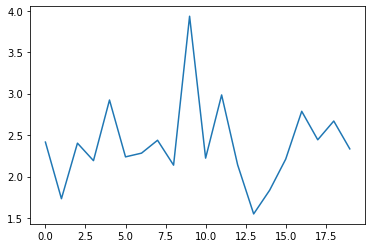

In [193]:
plt.plot(y_test.reset_index().drop(columns="Start Date")[0:n])
plt.plot(y_pred[0])
plt.show()